#  Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load and Clean Data

In [14]:
df = pd.read_csv('C:/Users/teste/Downloads/Amazon Sale Report.csv', encoding='ISO-8859-1')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


# Preprocessing

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Order ID', 'Date', 'Amount'])
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Amount'])
df

C:\Users\teste\AppData\Local\Temp\ipykernel_11764\2179013349.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\teste\AppData\Local\Temp\ipykernel_11764\2179013349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


# Sales Overview

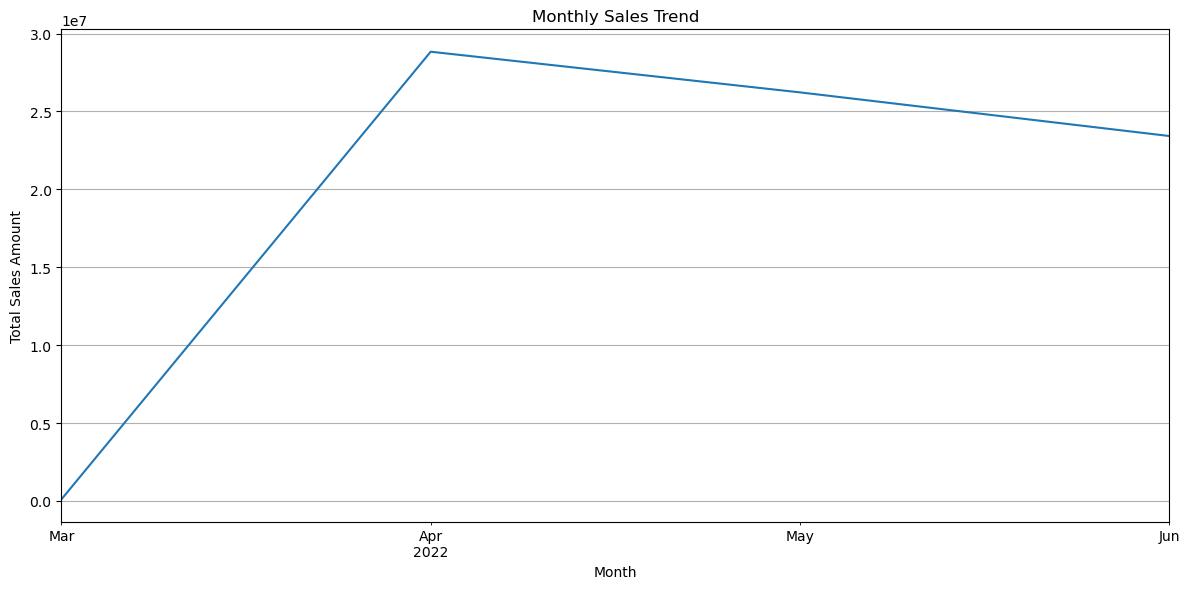

In [17]:
monthly_sales = df.resample('M', on='Date')['Amount'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

# Product Analysis

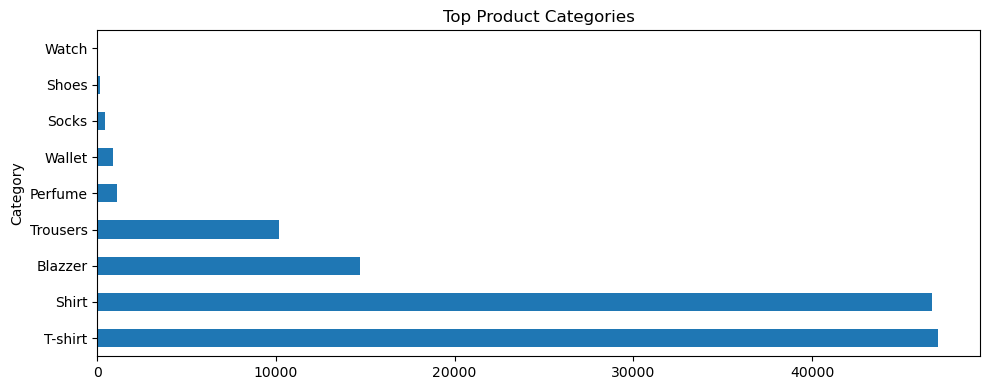

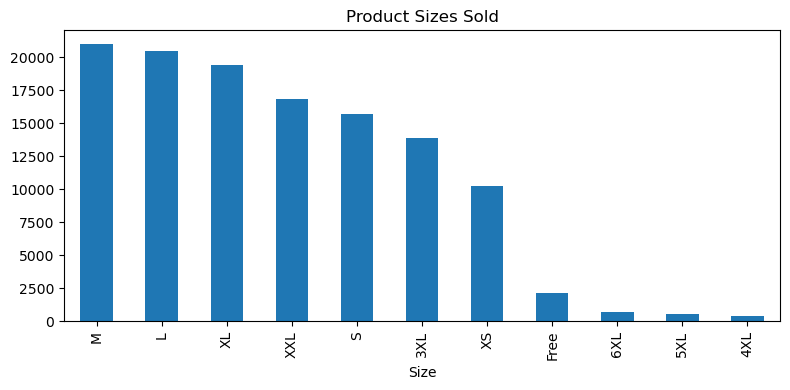

In [18]:
plt.figure(figsize=(10, 4))
df['Category'].value_counts().head(10).plot(kind='barh', title='Top Product Categories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
df['Size'].value_counts().plot(kind='bar', title='Product Sizes Sold')
plt.tight_layout()
plt.show()

# Fulfillment Analysis

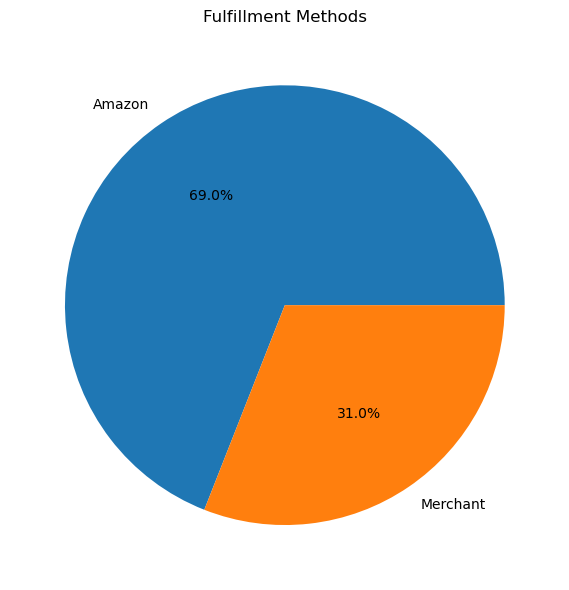

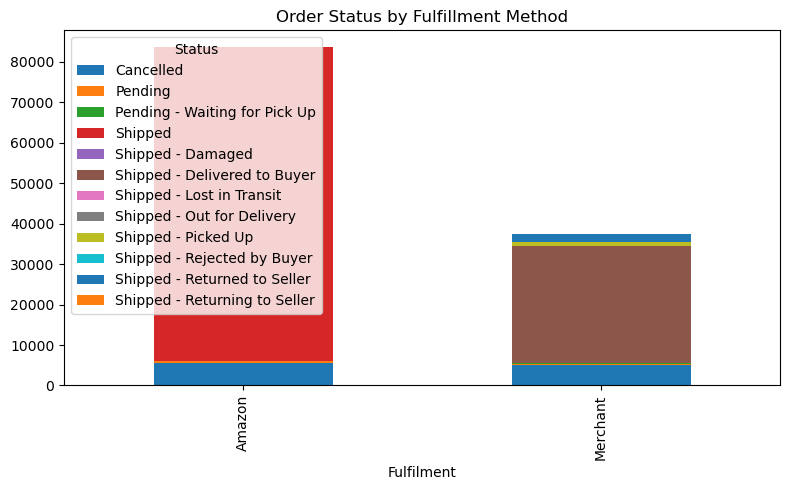

In [19]:
plt.figure(figsize=(6, 6))
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Fulfillment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()

fulfill_status = pd.crosstab(df['Fulfilment'], df['Status'])
fulfill_status.plot(kind='bar', stacked=True, figsize=(8,5), title='Order Status by Fulfillment Method')
plt.tight_layout()
plt.show()

# Customer Segmentation (Optional)

C:\Users\teste\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


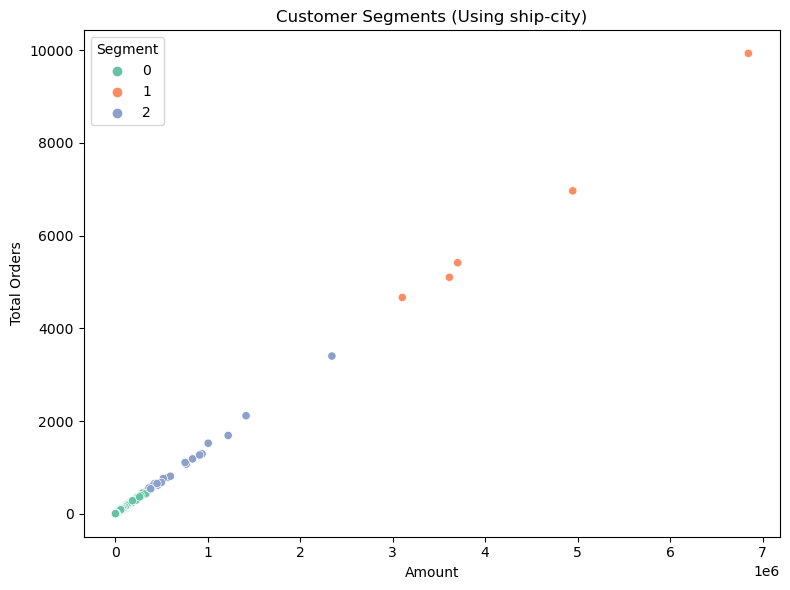

In [37]:
customer_identifier ='ship-city'

if customer_identifier in df.columns:
    customer_df = df.groupby(customer_identifier).agg({
        'Amount': 'sum',
        'Order ID': 'nunique',
        'ship-city': 'first'
    }).rename(columns={'Order ID': 'Total Orders'})

    if not customer_df.empty:
        scaler = StandardScaler()
        scaled = scaler.fit_transform(customer_df[['Amount', 'Total Orders']])

        kmeans = KMeans(n_clusters=3, random_state=42)
        customer_df['Segment'] = kmeans.fit_predict(scaled)

        plt.figure(figsize=(8,6))
        sns.scatterplot(data=customer_df, x='Amount', y='Total Orders', hue='Segment', palette='Set2')
        plt.title("Customer Segments (Using ship-city)")
        plt.tight_layout()
        plt.show()
    else:
        print("Customer data is empty after grouping.")
else:
    print(f"Column '{customer_identifier}' not found in dataset.")

# Geographical Analysis

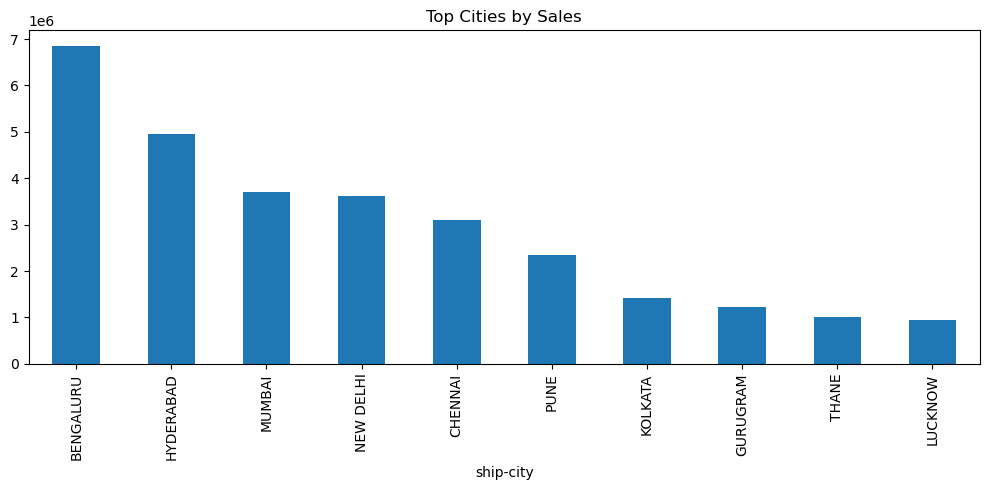

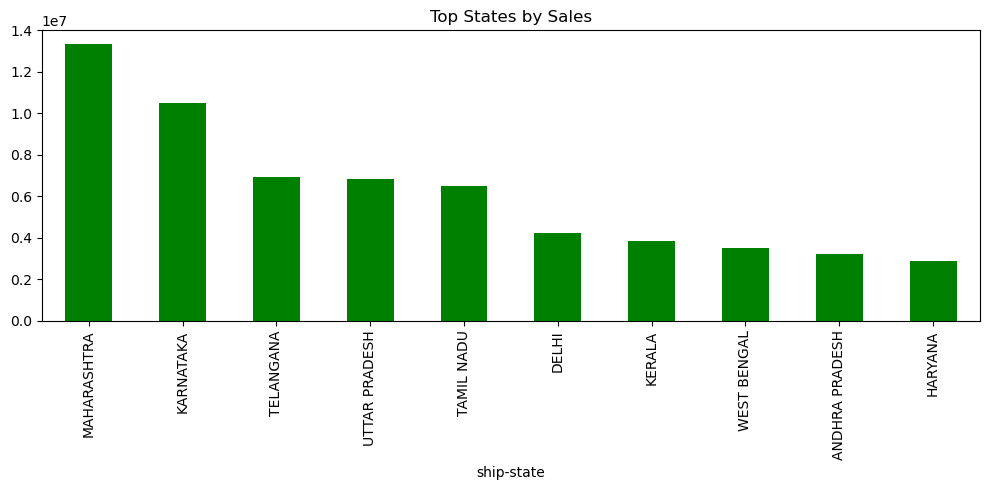

In [41]:
plt.figure(figsize=(10, 5))
df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top Cities by Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green', title='Top States by Sales')
plt.tight_layout()
plt.show()

# Business Insights & Recommendations 

In [45]:
# Top 5 selling categories by sales amount
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Product Categories by Revenue:\n", top_categories)


Top 5 Product Categories by Revenue:
 Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64


In [46]:
# Fulfillment performance: success rate
fulfillment_perf = df.groupby('Fulfilment')['Status'].value_counts(normalize=True).unstack().fillna(0)
print("\nFulfillment Method Performance (Success Rate):\n", fulfillment_perf)


Fulfillment Method Performance (Success Rate):
 Status      Cancelled   Pending  Pending - Waiting for Pick Up  Shipped  \
Fulfilment                                                                
Amazon       0.067293  0.004937                       0.000000  0.92777   
Merchant     0.136808  0.006475                       0.007488  0.00000   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon               0.000000                      0.000000   
Merchant             0.000027                      0.766062   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                       0.000000                    0.000000   
Merchant                     0.000133                    0.000933   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                              

In [49]:
# High-value customers
high_value_customers = df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 High-Value Customers:\n", high_value_customers)


Top 5 High-Value Customers:
 Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
Name: Amount, dtype: float64


In [52]:
# Top states by revenue
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 States by Sales:\n", top_states)


Top 5 States by Sales:
 ship-state
MAHARASHTRA      13340333.05
KARNATAKA        10480694.22
TELANGANA         6915018.08
UTTAR PRADESH     6823947.08
TAMIL NADU        6519182.30
Name: Amount, dtype: float64


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121176 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121176 non-null  int64         
 1   Order ID            121176 non-null  object        
 2   Date                121176 non-null  datetime64[ns]
 3   Status              121176 non-null  object        
 4   Fulfilment          121176 non-null  object        
 5   Sales Channel       121176 non-null  object        
 6   ship-service-level  121176 non-null  object        
 7   Category            121176 non-null  object        
 8   Size                121176 non-null  object        
 9   Courier Status      121176 non-null  object        
 10  Qty                 121176 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           121143 non-nul

In [53]:
# Conversion rate (if "Cancelled"/"Returned" exists in Status)
if 'Cancelled' in df['Status'].values or 'Returned' in df['Status'].values:
    total_orders = len(df)
    successful_orders = len(df[df['Status'] == 'Shipped'])
    conversion_rate = successful_orders / total_orders * 100
    print(f"\nOrder Success Conversion Rate: {conversion_rate:.2f}%")



Order Success Conversion Rate: 64.04%


# Clustering Evaluation Metrics

In [65]:
from sklearn.metrics import silhouette_score
if 'Segment' in customer_df.columns:
    inertia = kmeans.inertia_
    silhouette = silhouette_score(scaled, customer_df['Segment'])

    print(f"\nClustering Inertia (SSE): {inertia:.2f}")
    print(f"Silhouette Score: {silhouette:.3f}")


Clustering Inertia (SSE): 2245.61
Silhouette Score: 0.987


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
# Load and preprocess
df = pd.read_csv('C:/Users/teste/Downloads/Amazon Sale Report.csv', encoding='ISO-8859-1')
df = df.dropna(subset=['Date', 'Status', 'Category', 'Amount', 'Fulfilment'])
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [75]:
# Encode categorical columns
categorical_cols = ['Category', 'Fulfilment', 'Sales Channel', 'ship-service-level']
df[categorical_cols] = df[categorical_cols].astype(str)

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [76]:
# Define features and target
X = df[['Category', 'Fulfilment', 'Amount']]
y = df['Status']

In [77]:
# Encode target (Status
y_encoded = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [80]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Accuracy: 91.74%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.47      0.63      2177
           1       0.00      0.00      0.00       134
           2       0.00      0.00      0.00        59
           3       0.93      1.00      0.96     15435
           5       0.89      0.99      0.94      5823
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00       196
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00       374
          11       0.00      0.00      0.00        28

    accuracy                           0.92     24236
   macro avg       0.28      0.25      0.25     24236
weighted avg       0.89      0.92      0.89     24236

Confusion Matrix:
 [[ 1025     0     1  1116    35     0     0     0     0     0]
 [    0     0     4    89    41     0     0     0     0     0]
 [    1     0     0     0    58     0     0  

C:\Users\teste\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\teste\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\teste\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
